# FLIPKART CUSTOMER SENTIMENT PROJECT

**Presented by:**

1. Pauline Ndungu
2. Samuel Mbugua Igecha
3. Leonard Rotich
4. Samwel Muiru
5. Maureen Anduuru
6. Henry Mativo

# 1.0 Business Understanding
## 1.1 Overview

Flipkart Private Limited is a prominent Indian e-commerce company headquartered in Bengaluru. Established in Singapore as a private limited company, Flipkart initially specialized in online book sales. Over time, the company expanded its offerings to encompass various product categories such as consumer electronics, fashion, home essentials, groceries, and lifestyle products.

In the highly competitive Indian e-commerce landscape, Flipkart's key rivals include Amazon India, Alibaba and domestic contender Snapdeal. As of March 2017, Flipkart secured a substantial 39.5% market share in the Indian e-commerce industry. Notably, the company has established a dominant presence in the apparel segment, thanks to its strategic acquisition of Myntra. Furthermore, Flipkart competes head-to-head with Amazon in the sale of electronics and mobile phones, signifying its strength in those areas.

## 1.2 Problem Statement
The stakeholder for this project is Flipkart, a prominent Indian e-commerce company. Flipkart aims to leverage Natural Language Processing (NLP) techniques to enhance its business understanding and improve customer experiences.

The project focuses on utilizing NLP algorithms and methodologies to gain valuable insights from customer feedback, product reviews, and other textual data available on the Flipkart platform. By analyzing and extracting information from this data, Flipkart aims to gain a comprehensive understanding of customer preferences, sentiments, and needs.

Specifically, the project involves applying NLP techniques to perform sentiment analysis, topic modeling, and customer sentiment classification. By leveraging these methods, Flipkart seeks to identify emerging trends, popular product categories, and areas for improvement within its offerings.

By harnessing the power of NLP, Flipkart aims to enhance its decision-making processes, refine its product selection, and provide a more tailored and satisfying shopping experience for its customers. This project aligns with Flipkart's commitment to continuous innovation and delivering value to its customer base through cutting-edge technologies.

## 1.3 Metrics of Success
To assess the performance of the final model, we utilized accuracy, precision, and recall metrics.

Achieving a metric of success with an accuracy of `80%` is a significant goal. This accuracy metric measures the proportion of correctly predicted instances out of the total, indicating that the model or solution being developed has a strong ability to classify instances correctly.

Setting the bar at 80% suggests that the model should outperform random chance and deliver a satisfactory level of performance in accurately predicting the target variable.

## 1.4 Main Objective

Develop an NLP Application that will allow users to input new product reviews and deploy the sentiment analysis model in a production environment to classify the sentiment of reviews in real time.

### Specific Objective

1.  ***Sentiment Analysis*** - Perform sentiment analysis on customer reviews, ratings, and feedback to accurately identify positive, negative, and neutral sentiments, allowing for actionable insights and targeted improvements.

2. Improve the accuracy and relevance of search results and product descriptions by leveraging NLP techniques such as natural language understanding and information extraction.



# 2.0 Data Understanding

The Dataset contains 189,874 rows and 5 columns. The column names include;

1. `ProductName` - Name of products
2. `Price` - the prices of the products(In Indian Rupees)
3. `Rate` - the customers' ratings out of 5
4. `Review` - short customer review of the products
5. `summary` - more detailed review of the products

# 3.0 Data Preparation

### Importing Libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import string
import pickle

# import important libraries
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
# from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment import SentimentIntensityAnalyzer


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score,precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE


# Warning libraries
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings('ignore')

### Loading the data

In [34]:
data = pd.read_csv('Data/flipkart_product.csv', encoding='latin-1')
data.head(5)

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product


### Data Exploration

Before any cleaning and analysis takes place, we will first explore our dataset.

In [35]:
# class to describe dataset

class Describer:

    # initialize object
    def __init__(self, df):
        self.df = df

    # method to check shape of data
    def shape(self):
        out = print(f"The DataFrame has:\n\t* {self.df.shape[0]} rows\n\t* {self.df.shape[1]} columns", '\n')
        return out

    # method to check info on dataset
    def data_info(self):
        out = print(self.df.info(), '\n')
        return out

    # method to describe numerical columns
    def data_describe(self):
        out = self.df.describe()
        return out

In [36]:
# creating an instance of the class describer
describe_df = Describer(data)

# lets view the shape of the data
describe_df.shape()

The DataFrame has:
	* 189874 rows
	* 5 columns 



In [37]:
#Getting data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189874 entries, 0 to 189873
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ProductName  189874 non-null  object
 1   Price        189873 non-null  object
 2   Rate         189873 non-null  object
 3   Review       189870 non-null  object
 4   Summary      189860 non-null  object
dtypes: object(5)
memory usage: 7.2+ MB


In [38]:
data.columns

Index(['ProductName', 'Price', 'Rate', 'Review', 'Summary'], dtype='object')

In [39]:
data.dtypes

ProductName    object
Price          object
Rate           object
Review         object
Summary        object
dtype: object

In [40]:
# Checking the shape of dataset
print('Number of rows:',data.shape[0])
print('Number of columns:',data.shape[1])

Number of rows: 189874
Number of columns: 5


### 1.2 Data Cleaning

Our dataset is messy, so we shall clean it by dropping Null values and duplicates. We shall also deal with the inconsistencies like removing symbols, punctuations, strings from our numeric data(Price, Rate columns) then will change the datatypes of Price and Rate columns from string to numeric

To ensure the development of a robust and accurate model, several data cleaning techniques will be applied to the dataset. The following techniques will be employed:

1. `Completeness`: This technique involves addressing missing values within the dataset. Steps will be taken to identify and handle missing data appropriately, either through imputation or removal, to ensure that the dataset is complete.

2. `Uniformity`: Uniformity is crucial during the data cleaning process to ensure consistency and accurate analysis. Inconsistent or non-uniform data can introduce errors and bias into the modeling process, leading to unreliable results. Robust techniques will be employed to detect and handle non-uniformity effectively, ensuring that the data is standardized and aligned.

3. `Consistency`: The consistency of the data will be examined to identify any discrepancies or irregularities. Inconsistencies in variables, such as conflicting formats or conflicting information within the dataset, will be addressed and resolved to maintain data integrity.



By applying these data cleaning techniques, the dataset will be refined and prepared, ensuring the reliability and accuracy of the data before proceeding with the subsequent stages of analysis and modeling.

### 1.2.1 Completeness

To achieve completeness in our data, I will be checking for missing values in the data.

In [41]:
# function to identify missing values

# identify missing
def identify_missing_values(data):
    """Identify is the data has missing values"""
    # identify if data has missing values(data.isnull().any())
    # empty dict to store missing values
    missing = []
    for i in data.isnull().any():
        # add the bool values to empty list
        missing.append(i)
    # covert list to set (if data has missing value, the list should have true and false)
    missing_set = set(missing)
    if (len(missing_set) == 1):
        out = print("The Data has no missing values")
    else:
        out = print("The Data has missing values.")

    return out

identify_missing_values(data)

The Data has missing values.


From the above,  we see that we have missing values in ProductName, Price, Rate, Review and Summary.

We are going to remove the missing values in price, rate,review and summary because the dataset includes various products with different prices, rates and reviews thus replacing them may alter the dataset unintentionally.

In [42]:
# function to display missing values

def missing_values(data):
    """A simple function to identify data has missing values"""
    # identify the total missing values per column
    # sort in order
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)

    # store in a dataframe
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})

    # remove values that are missing
    missing.drop(missing[missing["Percentage(%)"] == 0].index, inplace = True)

    return missing


missing_values(data)

,Missing Values,Percentage(%)
Summary,14,0.000074
Review,4,0.000021
Price,1,0.000005
Rate,1,0.000005


In [43]:
# dropping missing rows in the columns
data.dropna(axis=0,subset=['Summary'],inplace=True)
data.dropna(axis=0,subset=['Review'],inplace=True)
data.dropna(axis=0,subset=['Rate'],inplace=True)
data.dropna(axis=0,subset=['Price'],inplace=True)


In [44]:
identify_missing_values(data)

The Data has no missing values


We have now removed the null values from our dataset

### 1.2.2 Uniformity

For our data to be uniform, I have to verify that every column is correct and convert them to there appropriate data type.

In [45]:
# function to remove punctuation
def rmv_punc(text):
    punct = string.punctuation
    return text.translate(str.maketrans('', '', punct))

In [46]:
# remove punctuations from price & summary  column
data['Summary'] = data['Summary'].apply(lambda x: rmv_punc(x))
data['Price'] = data['Price'].apply(lambda x: rmv_punc(x))
data['Review'] = data['Review'].apply(lambda x: rmv_punc(x))

In [47]:
# remove characters
def rmv_char(text):
    text = re.sub('[^a-zA-Z0-9(/)]',' ', text)
    text = re.sub('\s+',' ', text) #remove whitespace
    
    return text

In [48]:
def remove_char_price(text):
    text = re.sub(r'[^0-9\.]', '', text)
    return text


In [49]:
# remove characters from product & Price columns
data['Price'] = data['Price'].apply(lambda x: rmv_char(x).lower())
data['ProductName']=data['ProductName'].apply(lambda x:rmv_char(x))
data['Summary']=data['Summary'].apply(lambda x:rmv_char(x))
data['Price'] = data['Price'].apply(lambda x: remove_char_price(x).lower())

In [50]:
data.Rate.value_counts()

5                                                              108684
4                                                               39649
1                                                               19607
3                                                               15680
2                                                                6233
Pigeon Favourite Electric Kettle?ÿ?ÿ(1.5 L, Silver, Black)          1
Bajaj DX 2 L/W Dry Iron                                             1
Nova Plus Amaze NI 10 1100 W Dry Iron?ÿ?ÿ(Grey & Turquoise)         1
s                                                                   1
Name: Rate, dtype: int64

The Rate column contains string dataset where all should be numeric, we will remove the string in this column and convert to numeric datatype.

In [51]:
# Drop the string values in the 'Rate' column
data = data[pd.to_numeric(data['Rate'], errors='coerce').notnull()]

In [52]:
data.Rate.value_counts()

5    108684
4     39649
1     19607
3     15680
2      6233
Name: Rate, dtype: int64

Rows containing string values from the Rate column have been confirmed to be dropped.

In [53]:
data.dtypes

ProductName    object
Price          object
Rate           object
Review         object
Summary        object
dtype: object

In [54]:
data.head()

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler (White Bl...,3999,5,Super,Great cooler excellent air flow and for this p...
1,Candes 12 L Room/Personal Air Cooler (White Bl...,3999,5,Awesome,Best budget 2 fit cooler Nice cooling
2,Candes 12 L Room/Personal Air Cooler (White Bl...,3999,3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler (White Bl...,3999,1,Useless product,Very bad product its a only a fan
4,Candes 12 L Room/Personal Air Cooler (White Bl...,3999,3,Fair,Ok ok product


In [55]:
# Convert datatypes
data['Price'] = data['Price'].astype(float)
data['Rate'] = data['Rate'].astype(float)
print(data.dtypes)

ProductName     object
Price          float64
Rate           float64
Review          object
Summary         object
dtype: object


### 1.2.3 Consistency

For the data to be constistent, we need to resolve any inconsistencies by checking for duplicate values in our data.

In [56]:
# checking for duplicates

# Duplicated entries
def identify_duplicates(data):
    """Simple function to identify any duplicates"""
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in data.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
    duplicates_set = set(duplicates)
    if (len(duplicates_set) == 1):
        print("The Data has no duplicates")
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.")



identify_duplicates(data)

The Data has 26899 duplicated rows.
This constitutes 14.168% of the data set.


In [57]:
# handling the duplicates
def remove_duplicated_rows(data):
    """Simple Function to remove duplicated rows"""
    data.drop_duplicates(subset=None, keep="first", inplace=True)
    # confirm if the duplicated rows have been removed
    confirm = identify_duplicates(data)

    return confirm


remove_duplicated_rows(data)

The Data has no duplicates


Duplicates have been confirmed to be dropped

There's now 163683 rows remaining in our dataset after dropping a few rows from the dataset

In [58]:
# Display cleaned dataset
data.head(2)

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,5.0,Super,Great cooler excellent air flow and for this p...
1,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,5.0,Awesome,Best budget 2 fit cooler Nice cooling


## DATA TRANSFORMATION
### Adding new columns

To improve our analysis, I will be adding 2 new column from columns that share have similarities or add more analytical value.

> **polarity**

For further analysis we will add the `Sentiment` column derived from the `Review` to extract the polarity scores from the reviews with the sentiments. A polarity score of 0 indicates neutral sentiment where as above 0 indicates positive sentiment and below 0 indicates negative sentiment.

> **Product Sentiment**

We then add the `product_sentiment` column that categorizes the sentiment scores into three predefined sentiment categories: 'Negative', 'Neutral', and 'Positive'. This categorization provides a more interpretable representation of the sentiment, allowing for easier analysis and comparison across different products or reviews.

In [59]:
# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Extract polarity scores from the Review column
data['polarity'] = data['Summary'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify sentiments as positive or negative
data['product_sentiment'] = pd.cut(data['polarity'], bins=[-1, -0.1, 0.1, 1], labels=['Negative', 'Neutral', 'Positive'])

# Check the updated DataFrame
data.head(5)

,ProductName,Price,Rate,Review,Summary,polarity,product_sentiment
0,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,5.0,Super,Great cooler excellent air flow and for this p...,0.9576,Positive
1,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,5.0,Awesome,Best budget 2 fit cooler Nice cooling,0.8591,Positive
2,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,3.0,Fair,The quality is good but the power of air is de...,0.2382,Positive
3,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,1.0,Useless product,Very bad product its a only a fan,-0.3597,Negative
4,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,3.0,Fair,Ok ok product,0.5267,Positive


In [60]:
data['product_sentiment'].value_counts()

Positive    124565
Negative     20658
Neutral      17731
Name: product_sentiment, dtype: int64

# Exploratory Data Analysis

This section will be the exploratory data analysis question where we will exploring and seeing the relationship the different columns.

Given the nature of our dataset, we will be focusing on the following columns:
#### Numerical Columns
* `Price`
* `Rate`
* `polarity`
#### Categorical Columns
* `product_sentiment`

### Univariate Analysis
#### Numerical Univariate Analysis

In [61]:
def plot_distribution(df, column):

    plt.figure(figsize=(16, 8))
    # Example data
    prices = data.Price

    # Create bins for the price data
    bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 
    4000, 4500, 5000, 5500, 6000,6500,7000,7500,8000 ]

    # Group the prices into bins and plot the counts
    counts = pd.cut(prices, bins).value_counts().sort_index()
    ax = counts.plot(kind='bar')

    
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f"Distribution based on Value Counts: {column}")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
    plt.show()

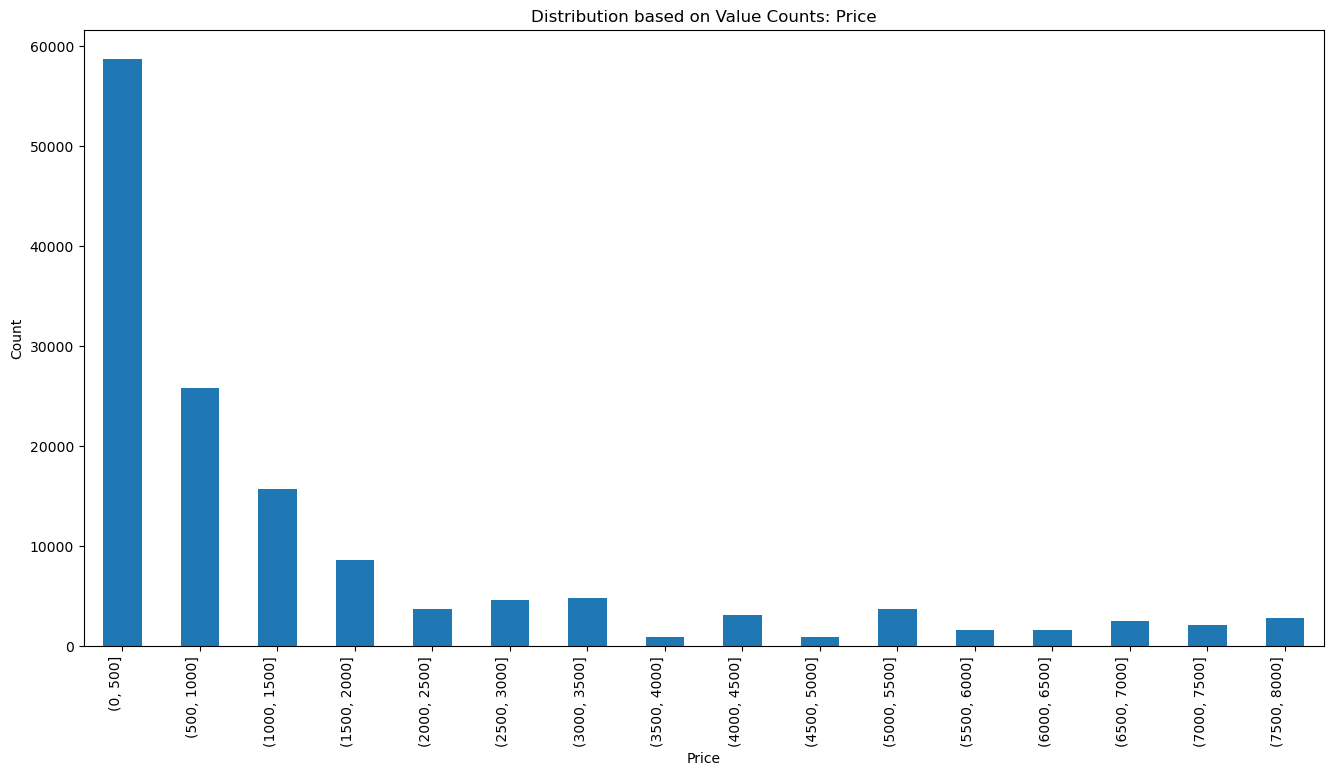

In [62]:
plot_distribution(data, 'Price')

When comparing the number of products listed according to price, we notice that Flipkart host products that are above the 1000 rupee mark.

However, the are various products ranging from 90 to 500 rupees that Flipkart host.

In [63]:
def plot_distribution2(df, column):
    """
    Plots the distribution of a specified column based on value counts in a DataFrame.

    Args:
        df (DataFrame): The pandas DataFrame containing the data.
        column (str): The column name for which to plot the distribution.

    """
    plt.figure(figsize=(16, 8))
    rounded_values = df[column].round(1)
    value_counts = rounded_values.value_counts()
    sorted_counts = value_counts.sort_index()
    ax = sns.barplot(x=sorted_counts.index, y=sorted_counts.values)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f"Distribution based on Value Counts: {column}")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    plt.ylim(0, sorted_counts.max() + 1)  # Set y-axis limit to include all counts
    plt.show()

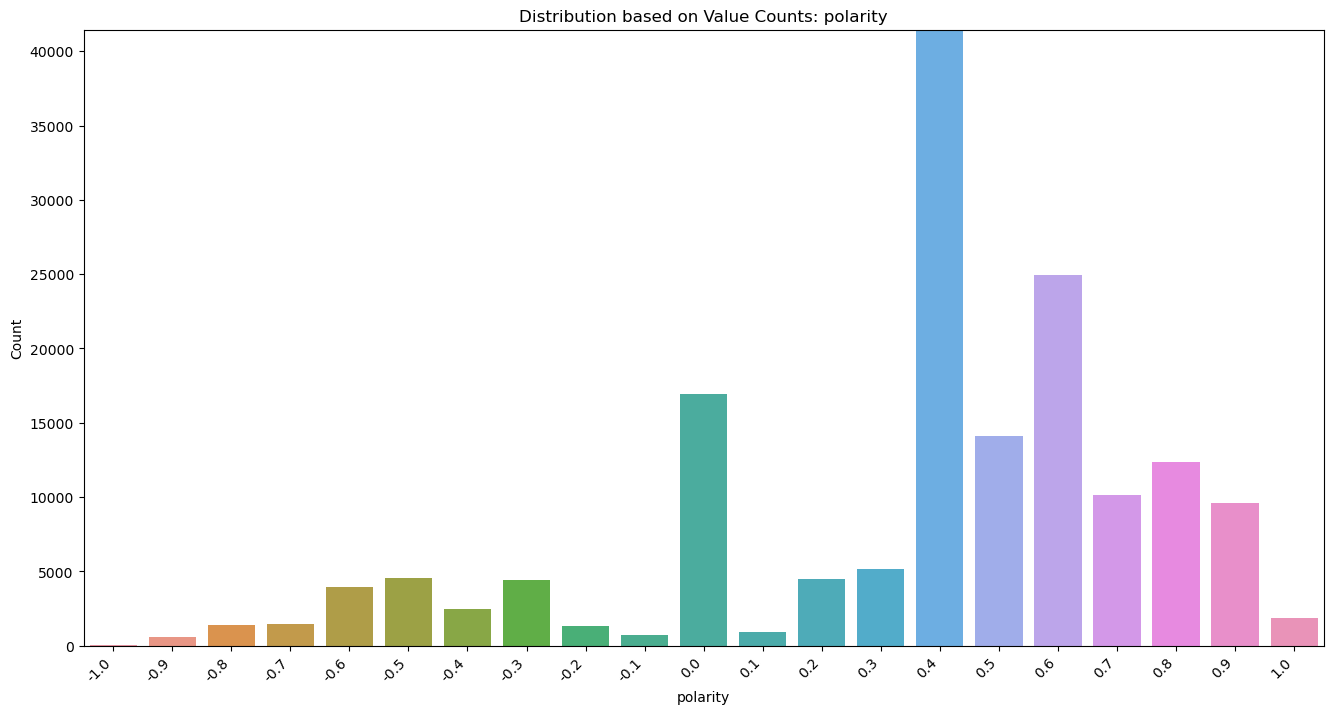

In [64]:
plot_distribution2(data, 'polarity')

When checking on polarity, we see that there is a high number of products that scored a polarity of 0.0 and above, meaning that there was a positive sentiment towards a majority of the products.

In [65]:
def plot_distribution3(df, column):
    """
    Plots the distribution of a specified column based on value counts in a DataFrame.

    Args:
        df (DataFrame): The pandas DataFrame containing the data.
        column (str): The column name for which to plot the distribution.

    """
    plt.figure(figsize=(16, 8))
    sns.barplot(x=df[column].value_counts().index, y=df[column].value_counts().values)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f"Distribution based on Value Counts: {column}")
    plt.show()

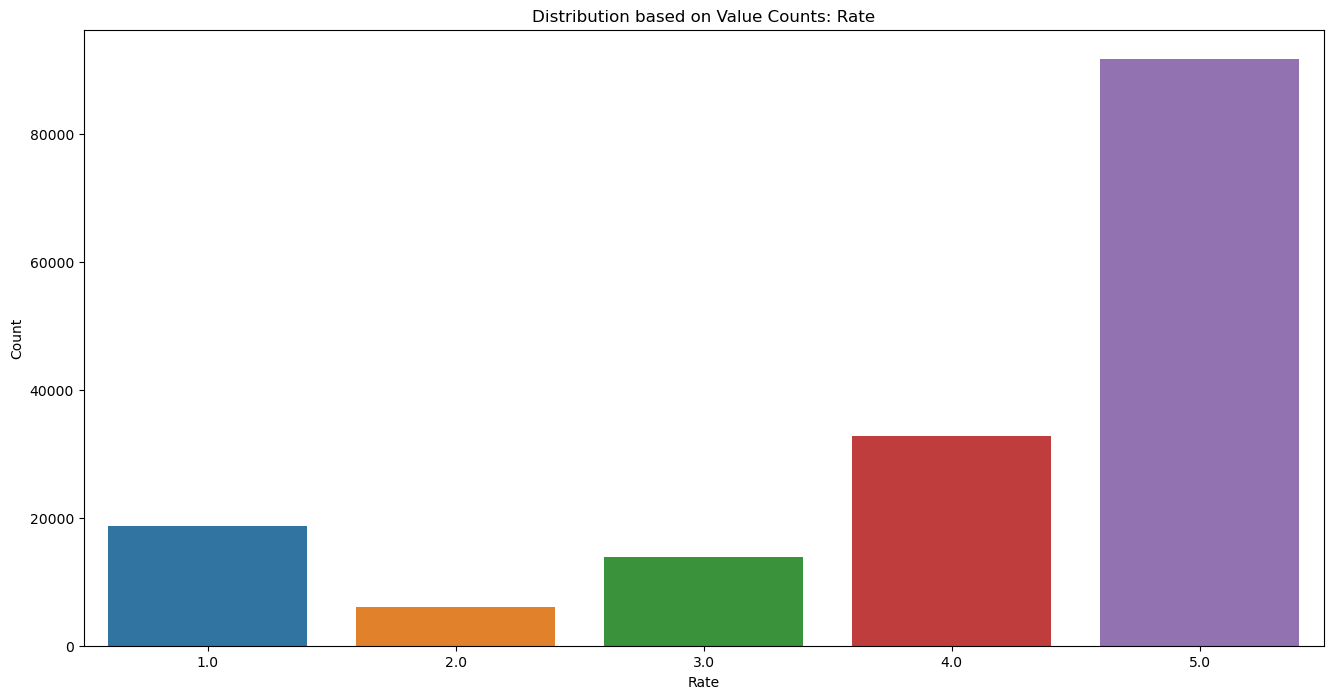

In [66]:
plot_distribution3(data, 'Rate')

- From the bar plot above it's indicated that there was far more 5 star reviews of products in our dataset indicating higher positive sentiments

#### Categorical Univariate Analysis

In [67]:
# No of reviews per sentiments
data.product_sentiment.value_counts()

Positive    124565
Negative     20658
Neutral      17731
Name: product_sentiment, dtype: int64

In [68]:
# Percentage of reviews per sentiment
percentage = data['product_sentiment'].value_counts(normalize=True)
print(percentage * 100)

Positive    76.441818
Negative    12.677197
Neutral     10.880985
Name: product_sentiment, dtype: float64


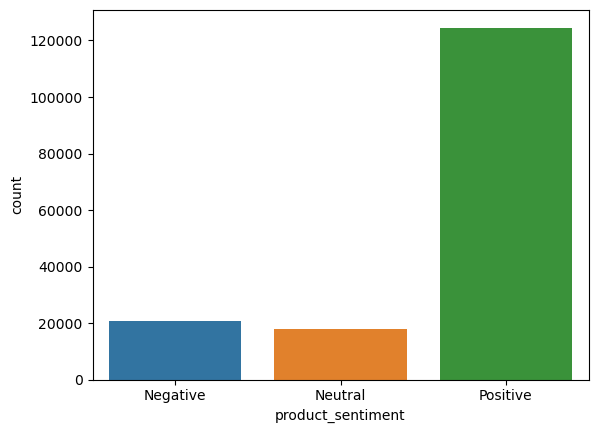

In [69]:
# Visualization of target variable/product sentiment
ax = sns.countplot(x = "product_sentiment", data = data)

- Upon closer inspection, it's confirmed there was far more positive sentiment at 69% followed by neutral sentiment at 22% and negative sentiment at 8%

## Bivariate Analysis

In [70]:
def bivariate_analysis_box(df, x_col, y_col):
    """
    Conducts bivariate analysis between two columns in a DataFrame and generates a box plot.

    Args:
        df (DataFrame): The pandas DataFrame containing the data.
        x_col (str): The name of the column to be plotted on the x-axis.
        y_col (str): The name of the column to be plotted on the y-axis.

    """
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=x_col, y=y_col)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"Bivariate Analysis: {x_col} vs {y_col} (Box Plot)")
    plt.show()

In [71]:
def bivariate_analysis_scatter(df, x_col, y_col):
    """
    Conducts bivariate analysis between two columns in a DataFrame and generates scatter and box plots.

    Args:
        df (DataFrame): The pandas DataFrame containing the data.
        x_col (str): The name of the column to be plotted on the x-axis.
        y_col (str): The name of the column to be plotted on the y-axis.

    """
    plt.figure(figsize=(10, 8))

    # Scatter plot
    # plt.subplot(1, 2, 1)
    sns.scatterplot(data=df, x=x_col, y=y_col)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"Bivariate Analysis: {x_col} vs {y_col} (Scatter Plot)")
    plt.show()

### Relationship between Price and Sentiment(Polarity scores)

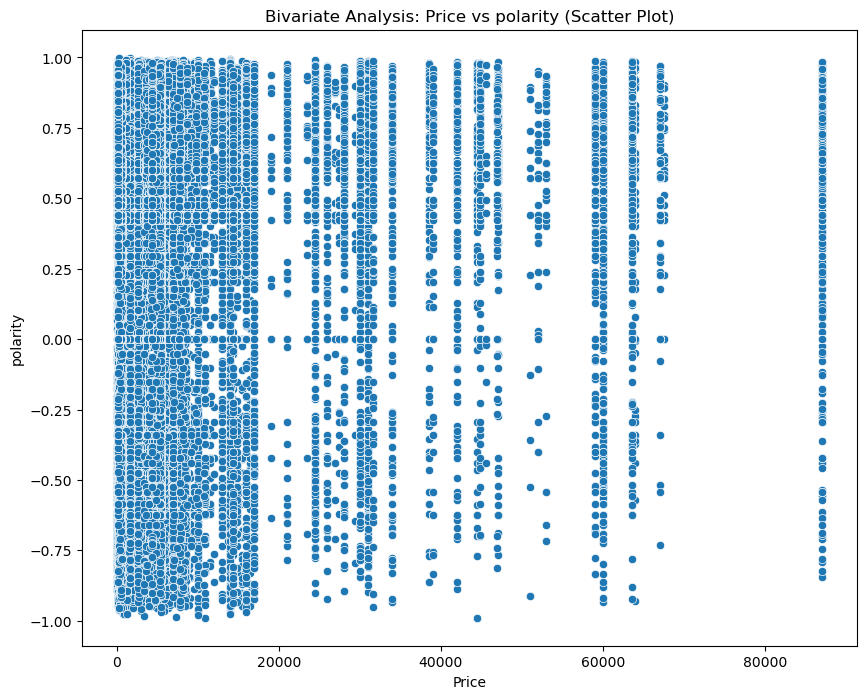

In [72]:
bivariate_analysis_scatter(data, 'Price', 'polarity')

- There's no relationship between Price and Polarity/Customer Sentiments. It makes sense because someone could buy products of higher or lower prices and it wouldn't be a factor for positive or negative sentiments. It could all come down to other factors like quality or wait times for delivery etc.

### Relationship between Price and Rate

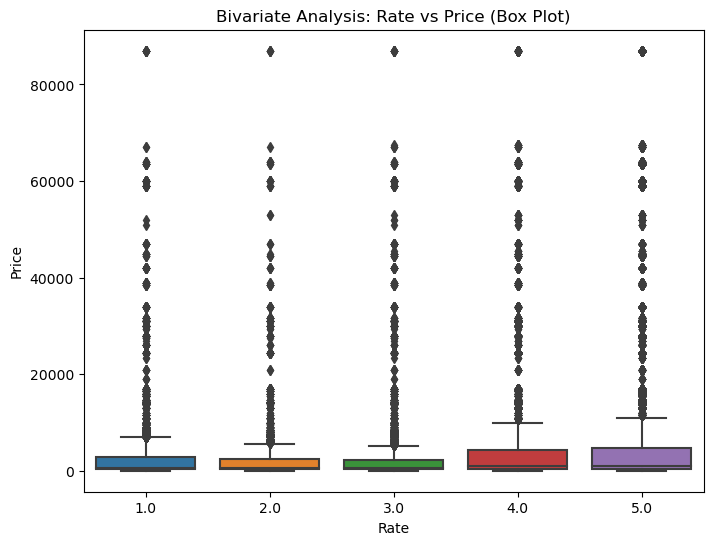

In [73]:
bivariate_analysis_box(data, 'Rate', 'Price')

From the plot above, we see that the price of a product has minor influence on the ratings it receives. This may indicate the price may not be the only factor that customers use when rating a product.

### Relationship between Sentiment and Rate

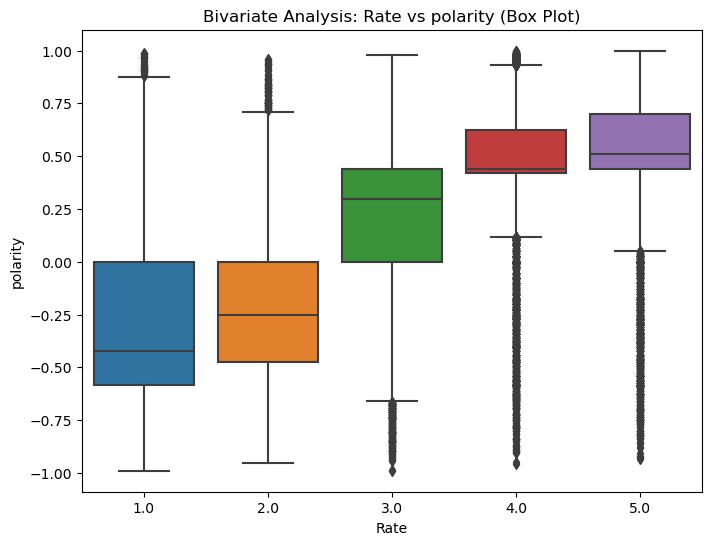

In [74]:
bivariate_analysis_box(data, 'Rate', 'polarity')

From the plot above, products with a high polarity tend to also have higher rates than products with low polarity, especially those below 0.0 polarity score.

### Relationship between product sentiment and Rate

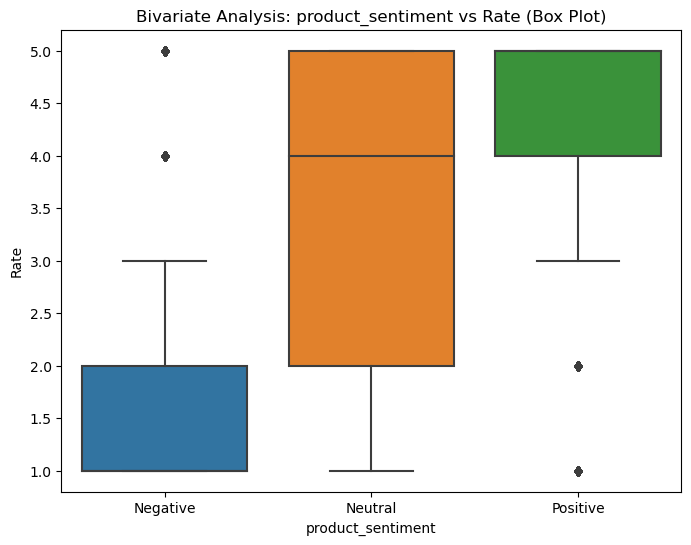

In [75]:
bivariate_analysis_box(data,'product_sentiment', 'Rate')

With then observe that products products with a positive sentiment are more likely to have higher rating scores that products with a negative sentiment.

### Relationship between product sentiment and Price

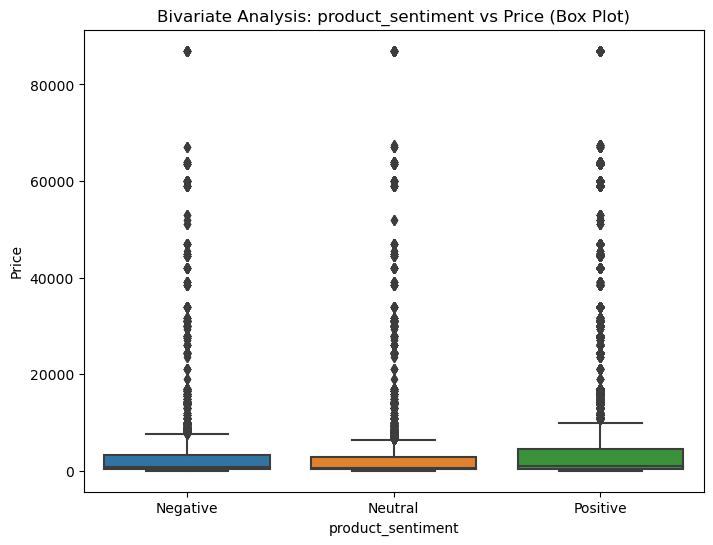

In [76]:
bivariate_analysis_box(data,'product_sentiment', 'Price')

From the plot above, we also notice that price has little influence on sentiment with distribution between positive, neutral and negative sentiment being almost equally distributed.

### Relationship between product sentiment and polarity

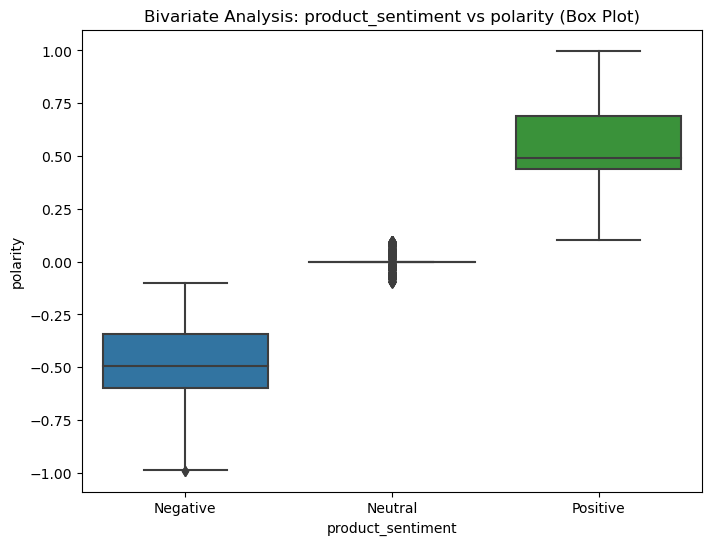

In [77]:
bivariate_analysis_box(data,'product_sentiment', 'polarity')

From the plot above, we notice that the bulk of positive sentiment have polarity scores between 0.75 and 0.4 while the bulk of negative sentiment has a polarity of between -0.25 and -0.6.

In [78]:
data.corr()

,Price,Rate,polarity
Price,1.000000,0.083571,0.076369
Rate,0.083571,1.000000,0.701022
polarity,0.076369,0.701022,1.000000


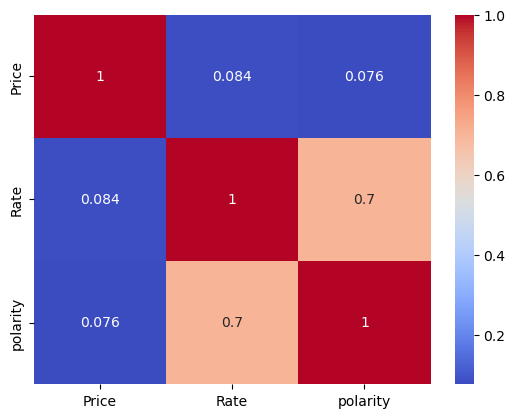

In [79]:
# Create a sample correlation matrix
correlation_matrix = data.corr()  # Replace df with your actual data

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Display the heatmap
plt.show()

From the plot above, we notice that products price barely has any influence on rating of a product. However, as long as there exist a negative sentiment, products will be rated worse, irregardless of price.

# PREPARATION FOR MODELLING

### Encoding

In [80]:
# encode target column
data['product_sentiment'] = data['product_sentiment'].map({'Positive':1, 'Negative':0, 'Neutral':2})


In [81]:
data['product_sentiment'].value_counts()

1    124565
0     20658
2     17731
Name: product_sentiment, dtype: int64

### 1.3 Text Preprocessing
We will do some text preprocessing to clean our text data(Summary). To do this we'll change it to lowercase, remove stop words, punctuation, We'll also tokenize & lemmatize our texts.

In [82]:
# normalizing the data to lowecase
data['Summary'] = data['Summary'].str.lower()
data.head(2)

,ProductName,Price,Rate,Review,Summary,polarity,product_sentiment
0,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,5.0,Super,great cooler excellent air flow and for this p...,0.9576,1
1,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,5.0,Awesome,best budget 2 fit cooler nice cooling,0.8591,1


In [83]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(Summary):
    # Use list comprehension for efficient list creation
    new_Summary = [word for word in Summary.split() if word not in stop_words]
    return " ".join(new_Summary)

# Apply the function to the 'Summary' column
data['Summary'] = data['Summary'].apply(remove_stopwords)

In [84]:
# removing the html tags
def remove_html(review):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', review)

data['Summary'] = data['Summary'].apply(remove_html)

In [85]:
# removing URL and @ sign

def preprocess_text_removingq_URLand_atsign(text):
    # Remove URLs
    clean_text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r'@[^\s]+', 'user', clean_text)
    # Other preprocessing steps like removing punctuation, converting to lowercase, etc.
    # ...
    return text

data['Summary'] = data['Summary'].apply(preprocess_text_removingq_URLand_atsign)

In [86]:
#!pip install contractions

In [87]:
# expanding the contractions (is-nots)

import contractions

def expand(text):
    # Expand contractions
    expanded_text = contractions.fix(text)

    return expanded_text

data['Summary'] = data['Summary'].apply(expand)

In [88]:
# punctuation
exclude = string.punctuation
print(exclude)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [89]:
# remove punctuations
def remove_punctuations(text):
    return text.translate(str.maketrans('','',exclude))

In [90]:
data['Summary']=data['Summary'].apply(remove_punctuations)
data.head(2)

,ProductName,Price,Rate,Review,Summary,polarity,product_sentiment
0,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,5.0,Super,great cooler excellent air flow price amazing ...,0.9576,1
1,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,5.0,Awesome,best budget 2 fit cooler nice cooling,0.8591,1


In [91]:
# tokenize the tweets
def tokenize_text(text):
    return word_tokenize(text)

data['Summary'] = data['Summary'].apply(tokenize_text)
data.head(2)

,ProductName,Price,Rate,Review,Summary,polarity,product_sentiment
0,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,5.0,Super,"[great, cooler, excellent, air, flow, price, a...",0.9576,1
1,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,5.0,Awesome,"[best, budget, 2, fit, cooler, nice, cooling]",0.8591,1


In [92]:
data['Summary'][1]

['best', 'budget', '2', 'fit', 'cooler', 'nice', 'cooling']

In [93]:
# lemmatization

# Create Lemmatizer and Stemmer.
word_lem = WordNetLemmatizer()

# function
def lem_words(text):
    return [word_lem.lemmatize(word) for word in text]

In [94]:
#nltk.download('omw-1.4')


In [95]:
data['Summary'] = data['Summary'].apply(lem_words)
data['Summary'].head(2)

0    [great, cooler, excellent, air, flow, price, a...
1        [best, budget, 2, fit, cooler, nice, cooling]
Name: Summary, dtype: object

In [96]:
data.drop(columns =['ProductName', 'Price', 'Rate', 'Review', 'polarity'], inplace=True)
data.head()

,Summary,product_sentiment
0,"[great, cooler, excellent, air, flow, price, a...",1
1,"[best, budget, 2, fit, cooler, nice, cooling]",1
2,"[quality, good, power, air, decent]",1
3,"[bad, product, fan]",0
4,"[ok, ok, product]",1


# Modelling

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

## Count Vectorization

In [98]:
# create instance 1 vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
bow = CountVectorizer()
data['lemmatized_summary'] = data['Summary'].str.join(" ")
X = bow.fit_transform(data['lemmatized_summary'])
y = data['product_sentiment']

## Train Test Split of the data
#### Splitting the data into training, and test test.

We shall then split the data and maintain a test size of 0.2, meaning 25% of our data will be used for testing and 75% will be used for training.

The random state will be maintained at 42 to ensure that the random splitting of the data will be reproducible.

In [99]:
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
y.value_counts()

1    124565
0     20658
2     17731
Name: product_sentiment, dtype: int64

In [101]:
# Verify the vectorized data
print(X_train[0])


  (0, 30366)	1
  (0, 16736)	2
  (0, 11481)	1
  (0, 15455)	1
  (0, 33487)	1
  (0, 37034)	1


In [102]:
X_train.shape, y_train.shape

((130363, 41666), (130363,))

# Building the Models

To keep track of the capabilities of these models, I will append them onto the list, models. I will be using the resampled models as they have taking into account the class imbalance present in the data

## Multi Classification

## Naives Bayes

In [103]:
from sklearn.naive_bayes import MultinomialNB

# instantiating Multinomial NB
nbc = MultinomialNB()

#Fitting
nbc.fit(X_train, y_train)

#Predicting
y_pred_nbc = nbc.predict(X_test)


#### Evaluating the Naives Bayes

In [104]:
# Calculate and print the accuracy on the training and test sets
print('Accuracy on training set:', nbc.score(X_train, y_train))
print('Accuracy on test set:', nbc.score(X_test, y_test))

Accuracy on training set: 0.8858878669561149
Accuracy on test set: 0.8688288177717775


``### Naives Bayes Machine Learning Communication @ Sam kindly work on this part with the correct values ``

#### Rationale why MultiNomial modeling was implemented.
While simpler forms of modeling can do , they may not be able to work with multi-class datasets.
##### Results.
>* Training accuracy: 96%
* Testing accuracy: 90%

* The accuracy means that the model can predict with an accuracy of 90% whether a tweet is positive or negative.

* The current model is fit for prediction since it is generalizing well to new data even with high accuracy.

##### Limitations of binary model.
* The current model is not fit for prediction since it is not generalizing well to new data even with high accuracy. The model is overfitting.

## Handling class imbalance issues

In [105]:
# initializing SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [106]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

## Gradient Boosting



In [118]:
import xgboost as xgb

# Create an XGBoost classifier instance
boost = xgb.XGBClassifier()

# Fit the model on the training data
boost.fit(X_train_res, y_train_res)

# Make predictions on the testing data
#predictions = xgb_classifier.predict(test_x)
y_pred_xgb =  boost.predict(X_test_res)
y_train_pred_xgb =  boost.predict(X_train_res)

#### Evaluating the XGBoost

In [119]:
# Calculate and print the accuracy on the training and test sets
print('Accuracy on training set:', boost.score(X_train_res, y_train_res))
print('Accuracy on test set:', boost.score(X_test_res, y_test_res))

Accuracy on training set: 0.9075616478679137
Accuracy on test set: 0.9049893629831814


`#### Machine Learning Communication XGBoost. @sam this are not the correct values of thr model`
##### Rationale why ensemble modeling will be implemented.
While simpler forms of data analysis, such as descriptive statistics or basic data visualization, can provide initial insights, they are not sufficient for complex problems or large datasets such as this one. Ensemble models leverages advanced algorithms to uncover hidden patterns, make accurate predictions.
##### Results.
>* Accuracy on the training set: 78%
* Accuracy on the testing set: 68%

The accuracy means that the model can predict with an accuracy of 78% whether a tweet falls within the specified labels.

#### Limitations.
The current model is not fit for prediction since it is overfitting.
This we see from the difference between train and test accuracy.

## Random forest


In [493]:
forest = RandomForestClassifier()

forest.fit(X_train_res,y_train_res)
y_pred_forest = forest.predict(X_test_res)

print('Accuracy on training set:',forest.score(X_train_res,y_train_res))
print('Accuracy on test set:',forest.score(X_test_res,y_test_res))

Accuracy on training set: 0.9281466168934559
Accuracy on test set: 0.8992226280790484


## Final note on modelling
Despite implementing resampling techniques to address class imbalance, the model's accuracy has not improved significantly. This suggests that other factors within the dataset may be limiting predictive performance.

The binary logisitc regression model performs best and is fit to be deployed.

## Deployment

In [120]:
# Saving files to pickle file

with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(bow, file)

with open('xgboost.pkl', 'wb') as file:
    pickle.dump(boost, file)